# TITANIC PASSENGER SURVIVAL

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\Robin Nagar\\Desktop\\titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will not consider factors like 'PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked' in this Analysis

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Independent Variables (Predictor Variables) = inputs

In [7]:
inputs=df.drop('Survived',axis='columns')

In [8]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


Dependent Variable (Target Variable) = target

In [11]:
target=df['Survived']

In [12]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

As Machine Learning algorithms works with numeric data hence we create dummy variable for Sex column

In [16]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


We merge the 'dummies' dataframe with 'inputs' dataframe

In [18]:
inputs=pd.concat([inputs,dummies],axis='columns')

In [19]:
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [20]:
inputs=inputs.drop('Sex',axis='columns')

In [21]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [22]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    uint8  
 4   male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


In [23]:
inputs.describe(include='all')

,Pclass,Age,Fare,female,male
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.836071,14.526497,49.693429,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,1.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


In [24]:
inputs['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [26]:
Age_mean=inputs['Age'].mean()
Age_mean

29.69911764705882

In [27]:
inputs['Age']=inputs['Age'].fillna(Age_mean)

In [28]:
inputs['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
inputs['Pclass'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool

In [30]:
inputs['Fare'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [33]:
len(x_train)

712

In [34]:
len(x_test)

179

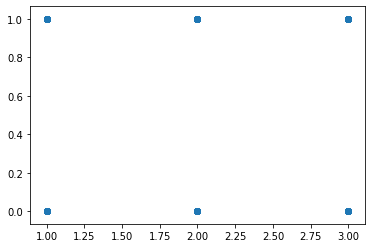

In [56]:
%matplotlib inline
plt.scatter(inputs.Pclass,target)

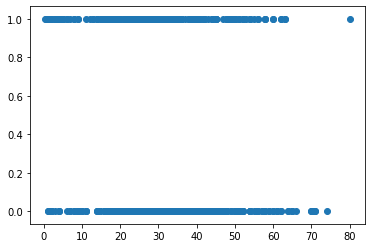

In [57]:
%matplotlib inline
plt.scatter(inputs.Age,target)

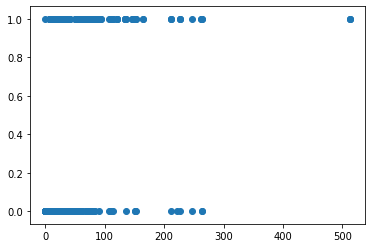

In [58]:
%matplotlib inline
plt.scatter(inputs.Fare,target)

We will apply Decision Tree Algorithm

In [36]:
from sklearn import tree

In [37]:
model=tree.DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Accuracy of Model 

In [59]:
model.score(x_test,y_test)

0.8212290502793296

Model is 82.12 % accurate 

In [41]:
model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [46]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [47]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Order of inputs : Pclass,Age,Fare,female,male

In [44]:
model.predict([[3,22.0,7.2500,0,1]])

array([0], dtype=int64)

The Passenger will not Survive

In [48]:
model.predict([[1,38.0,71.2833,1,0]])

array([1], dtype=int64)

The passenger will survive

#### Save the model to File

In [61]:
import joblib

In [62]:
joblib.dump(model,'C:\\Users\\Robin Nagar\\Desktop\\Titanic_Passenger_Survival')

['C:\\Users\\Robin Nagar\\Desktop\\Titanic_Passenger_Survival']